In [1]:
import sys
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix


In [2]:
# wiki = pd.read_json('wikidata-movies.json.gz', orient='record', lines=True)
# rotten = pd.read_json('rotten-tomatoes.json.gz', orient='record', lines=True)
# genres = pd.read_json('genres.json.gz', orient = 'record', lines=True)
wiki = pd.read_json('wikidata-movies.json.gz', orient = 'record', lines = True)
rotten_tomato = pd.read_json('rotten-tomatoes.json.gz', orient = 'record', lines = True)
genre = pd.read_json('genres.json.gz', orient = 'record', lines = True)
rotten = rotten_tomato.set_index('imdb_id')




wiki_join_tomato = wiki.join(rotten, on ='imdb_id', lsuffix='_caller', rsuffix='_other')
wiki_join_tomato = wiki_join_tomato.dropna(subset=['rotten_tomatoes_id_caller', 'rotten_tomatoes_id_other'])
wiki_join_tomato =wiki_join_tomato[wiki_join_tomato['rotten_tomatoes_id_caller'] == wiki_join_tomato['rotten_tomatoes_id_other']]

In [3]:
wiki_join_tomato

,based_on,cast_member,country_of_origin,director,enwiki_title,filming_location,genre,imdb_id,label,made_profit,...,publication_date,rotten_tomatoes_id_caller,series,wikidata_id,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,rotten_tomatoes_id_other
0,NaN,"[Q228931, Q235384]",Q145,[Q43079418],If I Were You (2012 Canadian film),NaN,[Q859369],tt1587309,If I Were You,NaN,...,2012-01-01,m/if_i_were_you_2012,NaN,Q43079072,3.9,72.0,244.0,3.7,9.0,m/if_i_were_you_2012
1,NaN,NaN,Q30,NaN,Krampus: The Devil Returns,NaN,[Q28026639],tt3527772,Krampus: The Devil Returns,NaN,...,2016-10-04,m/krampus_the_devil_returns,NaN,Q43302269,1.8,24.0,31.0,NaN,NaN,m/krampus_the_devil_returns
2,NaN,"[Q106303, Q467957, Q3345693, Q3340838, Q316419...",Q142,[Q724208],Le Brio,[Q50742],[Q157443],tt6462462,NaN,NaN,...,2017-01-01,m/le_brio,NaN,Q43400054,3.4,67.0,13.0,6.7,80.0,m/le_brio
3,NaN,NaN,Q30,[Q4718041],A Christmas Prince,NaN,"[Q860626, Q28026639]",tt7608418,A Christmas Prince,NaN,...,2017-11-17,m/a_christmas_prince,NaN,Q43401863,3.2,48.0,198.0,6.5,83.0,m/a_christmas_prince
4,Q7162696,NaN,Q252,[Q11036795],Pengabdi Setan (2017 film),NaN,[Q200092],tt7076834,Pengabdi Setan,NaN,...,2017-01-01,m/satans_slaves,NaN,Q41850450,4.0,77.0,39.0,NaN,NaN,m/satans_slaves
5,NaN,NaN,Q258,NaN,A Small Town Called Descent,NaN,[Q959790],tt3726330,A Small Town Called Descent,NaN,...,2010-07-24,m/a_small_town_called_descent,NaN,Q42048906,NaN,NaN,0.0,NaN,NaN,m/a_small_town_called_descent
6,NaN,"[Q5126010, Q3390414, Q5676024, Q237021]",Q29,[Q51892574],Orbiter 9,NaN,"[Q24925, Q21010853]",tt3469798,Orbiter 9,0.0,...,2017-04-07,m/orbiter_9,NaN,Q42577704,3.1,41.0,60.0,5.5,60.0,m/orbiter_9
7,Q18214949,"[Q202381, Q7367121, Q179576, Q20630818, Q28474...",Q30,[Q18608206],The Kindergarten Teacher (2018 film),NaN,[Q130232],tt6952960,The Kindergarten Teacher,NaN,...,2018-01-01,m/the_kindergarten_teacher_2018,NaN,Q47461695,NaN,NaN,27.0,7.7,92.0,m/the_kindergarten_teacher_2018
8,NaN,NaN,Q30,[Q22073902],Who the Fuck Is That Guy? The Fabulous Journey...,NaN,[Q93204],tt4958390,Who the Fuck is That Guy? The Fabulous Journey...,NaN,...,2017-07-21,m/who_the_fk_is_that_guy_the_fabulous_journey_...,NaN,Q47483224,3.7,69.0,35.0,NaN,NaN,m/who_the_fk_is_that_guy_the_fabulous_journey_...
9,NaN,NaN,Q30,NaN,The Black Dove,NaN,[Q130232],tt1844790,The Black Dove,NaN,...,2012-04-19,m/the_black_dove,NaN,Q42048757,NaN,NaN,9.0,NaN,NaN,m/the_black_dove


In [4]:
def to_timestamp_single(date):
	return date.timestamp()
to_timestamp = np.vectorize(to_timestamp_single)

In [5]:
wiki_join_tomato['audience_average'] = wiki_join_tomato['audience_average']/5
wiki_join_tomato['audience_percent'] = wiki_join_tomato['audience_percent']/100
wiki_join_tomato['critic_average'] = wiki_join_tomato['critic_average']/10
wiki_join_tomato['critic_percent'] = wiki_join_tomato['critic_percent']/100

In [6]:
wiki_join_tomato = wiki_join_tomato.drop(['based_on', 'cast_member','country_of_origin','director','enwiki_title','imdb_id', 'label', 'rotten_tomatoes_id_other', 'wikidata_id', 'series', 'rotten_tomatoes_id_caller','main_subject', 'filming_location', 'metacritic_id'], axis=1)

In [7]:
wiki_join_tomato = wiki_join_tomato[wiki_join_tomato['audience_ratings'] > 1000]
wiki_join_tomato = wiki_join_tomato.dropna(subset=['audience_average', 'audience_percent', 'audience_ratings', 'critic_average', 'critic_percent', 'publication_date']).reset_index()

In [8]:
wiki_join_tomato['publication_date'] = pd.to_datetime(wiki_join_tomato['publication_date'])
wiki_join_tomato['timestamp'] = wiki_join_tomato['publication_date'].apply(to_timestamp_single)
#check number of genres that each movie contained
#create a columns which shows number of genres included
wiki_join_tomato['number of genres'] = wiki_join_tomato.apply(lambda x: len(x['genre']), axis=1)
#We want to know the maximum of movies 
print("Maximum number of genres for all movies: " , wiki_join_tomato['number of genres'].max())

# wiki_join_tomato = wiki_join_tomato.sort_values('genre')

Maximum number of genres for all movies:  11


In [9]:
wiki_join_tomato = wiki_join_tomato.drop(['index'], axis = 1)
#There are at most 11 genres, generate 11 columns, each column represent 1 specific genre
wiki_join_tomato[['genre1', 'genre2', 'genre3','genre4', 'genre5', 'genre6','genre7', 'genre8', 'genre9','genre10', 'genre11']] = pd.DataFrame(wiki_join_tomato['genre'].values.tolist(), index=wiki_join_tomato.index)
#Joined two table genre and wiki_joint_tomato, we want to match genre_lable to each moive in table wiki_join_tomato
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre1')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre2', rsuffix='g2')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre3',  rsuffix='g3')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre4', rsuffix='g4')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre5', rsuffix='g5')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre6', rsuffix='g6')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre7', rsuffix='g7')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre8', rsuffix='g8')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre9', rsuffix='g9')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre10', rsuffix='g10')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre11', rsuffix='g11')
wiki_join_tomato = wiki_join_tomato.drop(['genre1','genre2','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11' ], axis = 1)
genres_count = pd.concat([wiki_join_tomato['genre_label'],wiki_join_tomato['genre_labelg2'], wiki_join_tomato['genre_labelg3'],wiki_join_tomato['genre_labelg4'], wiki_join_tomato['genre_labelg5'], 
wiki_join_tomato['genre_labelg6'], wiki_join_tomato['genre_labelg7'], wiki_join_tomato['genre_labelg8'],wiki_join_tomato['genre_labelg9'], wiki_join_tomato['genre_labelg10'], wiki_join_tomato['genre_labelg11'],])
# print(genres_count.value_counts())
series =  genres_count.value_counts().values
# drama film                      4797
# comedy film                     2551
# action film                     1624

    

# Top three genres that movies producers prefer to produce is drama, comedy and action 
# We are interested in top three movie topics 

In [10]:
drama_film = wiki_join_tomato[(wiki_join_tomato['genre_label']=='drama film')|(wiki_join_tomato['genre_labelg2']=='drama film')|(wiki_join_tomato['genre_labelg3']=='drama film')|(wiki_join_tomato['genre_labelg4']=='drama film')|
                    (wiki_join_tomato['genre_labelg5']=='drama film')|(wiki_join_tomato['genre_labelg6']=='drama film')|(wiki_join_tomato['genre_labelg7']=='drama film')|(wiki_join_tomato['genre_labelg8']=='drama film')|
                    (wiki_join_tomato['genre_labelg9']=='drama film')|(wiki_join_tomato['genre_labelg10']=='drama film')|(wiki_join_tomato['genre_labelg11']=='drama film')]
comedy_film = wiki_join_tomato[(wiki_join_tomato['genre_label']=='comedy film')|(wiki_join_tomato['genre_labelg2']=='comedy film')|(wiki_join_tomato['genre_labelg3']=='comedy film')|(wiki_join_tomato['genre_labelg4']=='comedy film')|
                    (wiki_join_tomato['genre_labelg5']=='comedy film')|(wiki_join_tomato['genre_labelg6']=='comedy film')|(wiki_join_tomato['genre_labelg7']=='comedy film')|(wiki_join_tomato['genre_labelg8']=='comedy film')|
                    (wiki_join_tomato['genre_labelg9']=='comedy film')|(wiki_join_tomato['genre_labelg10']=='comedy film')|(wiki_join_tomato['genre_labelg11']=='comedy film')]
action_film = wiki_join_tomato[(wiki_join_tomato['genre_label']=='action film')|(wiki_join_tomato['genre_labelg2']=='action film')|(wiki_join_tomato['genre_labelg3']=='action film')|(wiki_join_tomato['genre_labelg4']=='action film')|
                    (wiki_join_tomato['genre_labelg5']=='action film')|(wiki_join_tomato['genre_labelg6']=='action film')|(wiki_join_tomato['genre_labelg7']=='action film')|(wiki_join_tomato['genre_labelg8']=='action film')|
                    (wiki_join_tomato['genre_labelg9']=='action film')|(wiki_join_tomato['genre_labelg10']=='action film')|(wiki_join_tomato['genre_labelg11']=='action film')]

drama_film = drama_film.sort_values('timestamp')
comedy_film = comedy_film.sort_values('timestamp')
action_film = action_film.sort_values('timestamp')

In [11]:
year_drama_film = drama_film
year_comedy_film = comedy_film
year_action_film = action_film

In [12]:

year_drama_film['pb_year'] = year_drama_film['publication_date'].dt.year
year_drama_film = year_drama_film.groupby('pb_year').count()
year_drama_film = year_drama_film[['genre']]
year_drama_film = year_drama_film.rename(columns={"genre": "Drama film"})
year_drama_film['publication_year'] = year_drama_film.index
year_drama_film.reset_index(drop=True)

,Drama film,publication_year
0,1,1914
1,1,1915
2,1,1916
3,1,1921
4,2,1922
5,3,1924
6,2,1925
7,5,1927
8,1,1928
9,6,1929


In [13]:
year_comedy_film['pb_year'] = year_comedy_film['publication_date'].dt.year
year_comedy_film = year_comedy_film.groupby('pb_year').count()
year_comedy_film = year_comedy_film[['genre']]
year_comedy_film = year_comedy_film.rename(columns={"genre": "Comedy film"})
year_comedy_film['publication_year'] = year_comedy_film.index
year_comedy_film.reset_index(drop=True)

,Comedy film,publication_year
0,1,1923
1,1,1924
2,2,1928
3,1,1929
4,1,1930
5,3,1931
6,3,1932
7,3,1933
8,5,1934
9,3,1936


In [14]:
year_action_film['pb_year'] = year_action_film['publication_date'].dt.year
year_action_film = year_action_film.groupby('pb_year').count()
year_action_film = year_action_film[['genre']]
year_action_film = year_action_film.rename(columns={"genre": "Action film"})
year_action_film['publication_year'] = year_action_film.index
year_action_film.reset_index(drop=True)

,Action film,publication_year
0,1,1903
1,1,1924
2,1,1937
3,1,1938
4,1,1940
5,1,1944
6,1,1948
7,1,1956
8,1,1957
9,2,1958


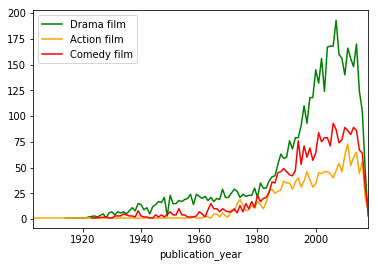

In [15]:
bx = plt.gca()
year_drama_film.plot(kind='line',x='publication_year',y='Drama film', color='green', ax= bx)
year_action_film.plot(kind='line',x='publication_year',y='Action film', color='orange', ax =bx)
year_comedy_film.plot(kind='line',x='publication_year',y='Comedy film', color='red', ax= bx)

In [16]:
print('audience average ratings linear regression slope:', stats.linregress(action_film['timestamp'],action_film['audience_average']).slope)
print('audience average ratings linear regression p-value:', stats.linregress(action_film['timestamp'],action_film['audience_average']).pvalue)
print('audience percentage linear regression slope:', stats.linregress(action_film['timestamp'],action_film['audience_percent']).slope)
print('audience percentage linear regression p-value:', stats.linregress(action_film['timestamp'],action_film['audience_percent']).pvalue)
print('critic average ratings linear regression slope:', stats.linregress(action_film['timestamp'],action_film['critic_average']).slope)
print('critic average ratings linear regression p-value:', stats.linregress(action_film['timestamp'],action_film['critic_average']).pvalue)
print('critic percentage linear regression slope:', stats.linregress(action_film['timestamp'],action_film['critic_percent']).slope)
print('critic percentage linear regression p-value:', stats.linregress(action_film['timestamp'],action_film['critic_percent']).pvalue)

audience average ratings linear regression slope: 1.1377192712603286e-11
audience average ratings linear regression p-value: 0.03519620449658341
audience percentage linear regression slope: -4.703109012582177e-11
audience percentage linear regression p-value: 6.0360762150684514e-05
critic average ratings linear regression slope: -4.567940227778707e-11
critic average ratings linear regression p-value: 6.684185631359148e-08
critic percentage linear regression slope: -1.183352430493e-10
critic percentage linear regression p-value: 2.2852414974645646e-13
